# 3-神经网络-多层网络，Sequential 和 Module


通过前面的两节，我们了解到机器学习领域中最常见的两个模型，线性回归模型和 Logistic 回归模型，他们分别是处理机器学习中最常见的两类问题 —— 回归问题和分类问题。

下面我们介绍一下第一个深度学习的模型，多层神经网络。

## 3.1、多层神经网络

在前面的线性回归中，我们的公式是 $y = w x + b$，而在 Logistic 回归中，我们的公式是 $y = Sigmoid(w x + b)$，其实它们都可以看成单层神经网络，其中 Sigmoid 被称为激活函数，之后我们会详细介绍激活函数以及为什么必须使用激活函数，下面我们从理解神经网络入手。

### 3.1.1、理解神经网络

神经网络的灵感来自于人脑的神经元系统，下面我们放一张人脑的神经元和神经网络的对比图(来自 cs231n) 

![](img/pt_3_6.jpg)

左边是一张神经元的图片，神经元通过突触接受输入，然后通过神经激活的方式传输给后面的神经元。这对比于右边的神经网络，首先接受数据输入，然后通过计算得到结果，接着经过激活函数，再传给第二层的神经元。

所以前面讲的 logistic 回归模型和线性回归模型都可以看做是一个单层神经网络，而 logistic 回归中使用了激活函数 sigmoid。

神经网络使用的激活函数都是非线性的，每个激活函数都输入一个值，然后做一种特定的数学运算得到一个结果，下面举几个例子

sigmoid 激活函数

![](img/pt_3_7.jpg)

tanh 激活函数

![](img/pt_3_8.jpg)

ReLU 激活函数

![](img/pt_3_9.jpg)

我们下面重点讲一讲 ReLU 激活函数，因为现在神经网络中 90% 的情况都是使用这个激活函数。一般一个一层的神经网络的公式就是 $y = max(0, w x + b)$，一个两层的神经网络就是 $y = w_2\ max(0, w_1 x + b_1) + b_2$，非常简单，但是却很有效，使用这个激活函数能够加快梯度下降法的收敛速度，同时对比与其他的激活函数，这个激活函数计算更加简单，所以现在变得非常流行，之后你会发现我们激活在所有的神经网络中都会使用它。

## 3.2、神经网络的结构

神经网络就是很多个神经元堆在一起形成一层神经网络，那么多个层堆叠在一起就是深层神经网络，我们可以通过下面的图展示一个两层的神经网络和三层的神经网络。

![](img/pt_3_10.jpg)

可以看到，神经网络的结构其实非常简单，主要有输入层，隐藏层，输出层构成，输入层需要根据特征数目来决定，输出层根据解决的问题来决定，那么隐藏层的网路层数以及每层的神经元数就是可以调节的参数，而不同的层数和每层的参数对模型的影响非常大，我们看看这个网站的 [demo](https://cs.stanford.edu/people/karpathy/convnetjs/demo/classify2d.html)

神经网络向前传播也非常简单，就是一层一层不断做运算就可以了，可以看看下面这个例子

![](img/pt_3_11.gif)

## 3.3、为什么要使用激活函数

激活函数在神经网络中非常重要，使用激活函数也是非常必要的，前面我们从人脑神经元的角度理解了激活函数，因为神经元需要通过激活才能往后传播，所以神经网络中需要激活函数，下面我们从数学的角度理解一下激活函数的必要性。

比如一个两层的神经网络，使用 A 表示激活函数，那么

$$
y = w_2 A(w_1 x)
$$
如果我们不使用激活函数，那么神经网络的结果就是

$$
y = w_2 (w_1 x) = (w_2 w_1) x = \bar{w} x
$$
可以看到，我们将两层神经网络的参数合在一起，用 $\bar{w}$ 来表示，两层的神经网络其实就变成了一层神经网络，只不过参数变成了新的 $\bar{w}$，所以如果不使用激活函数，那么不管多少层的神经网络，$y = w_n \cdots w_2 w_1 x = \bar{w} x$，就都变成了单层神经网络，所以在每一层我们都必须使用激活函数。

最后我们看看激活函数对神经网络的影响

![](img/pt_3_12.gif)

可以看到使用了激活函数之后，神经网络可以通过改变权重实现任意形状，越是复杂的神经网络能拟合的形状越复杂，这就是著名的神经网络万有逼近定理。

下面我们通过例子来感受一下神经网络的强大之处

In [2]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 将决策边界画出来
def plot_decision_boundary(model, x, y):
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

这次我们仍然处理一个二分类问题，但是比前面的 logistic 回归更加复杂

In [4]:
np.random.seed(1)
m = 400 # 样本数量
N = int(m/2) # 每一类的点的个数
D = 2 # 维度
x = np.zeros((m, D))
y = np.zeros((m, 1), dtype='uint8') # label 向量，0 表示红色，1 表示蓝色
a = 4

for j in range(2):
    ix = range(N*j,N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
    r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
    x[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

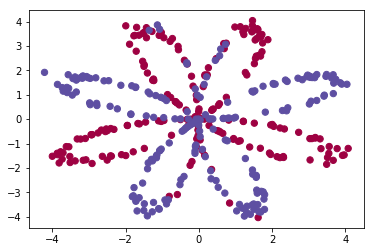

In [5]:
plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

我们可以先尝试用 logistic 回归来解决这个问题

In [6]:
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

In [7]:
w = nn.Parameter(torch.randn(2, 1))
b = nn.Parameter(torch.zeros(1))

optimizer = torch.optim.SGD([w, b], 1e-1)

def logistic_regression(x):
    return torch.mm(x, w) + b

criterion = nn.BCEWithLogitsLoss()

In [8]:
for e in range(100):
    out = logistic_regression(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e + 1) % 20 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data[0]))

epoch: 20, loss: 0.6804569363594055
epoch: 40, loss: 0.6733227968215942
epoch: 60, loss: 0.6731598377227783
epoch: 80, loss: 0.6731501221656799
epoch: 100, loss: 0.6731476783752441


D:\anacondapy3.6\lib\site-packages\ipykernel_launcher.py:8: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


In [9]:
def plot_logistic(x):
    x = Variable(torch.from_numpy(x).float())
    out = F.sigmoid(logistic_regression(x))
    out = (out > 0.5) * 1
    return out.data.numpy()

Text(0.5,1,'logistic regression')

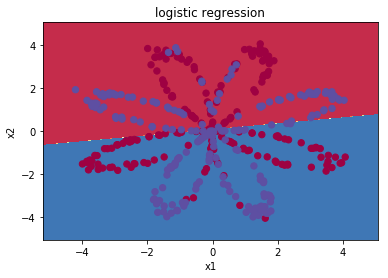

In [10]:
plot_decision_boundary(lambda x: plot_logistic(x), x.numpy(), y.numpy())
plt.title('logistic regression')

可以看到，logistic 回归并不能很好的区分开这个复杂的数据集，如果你还记得前面的内容，你就知道 logistic 回归是一个线性分类器，这个时候就该我们的神经网络登场了！

In [11]:
# 定义两层神经网络的参数
w1 = nn.Parameter(torch.randn(2, 4) * 0.01) # 隐藏层神经元个数 2
b1 = nn.Parameter(torch.zeros(4))

w2 = nn.Parameter(torch.randn(4, 1) * 0.01)
b2 = nn.Parameter(torch.zeros(1))

# 定义模型
def two_network(x):
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1) # 使用 PyTorch 自带的 tanh 激活函数
    x2 = torch.mm(x1, w2) + b2
    return x2

optimizer = torch.optim.SGD([w1, w2, b1, b2], 1.)

criterion = nn.BCEWithLogitsLoss()

In [12]:
# 我们训练 10000 次
for e in range(10000):
    out = two_network(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data[0]))

D:\anacondapy3.6\lib\site-packages\ipykernel_launcher.py:9: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if __name__ == '__main__':


epoch: 1000, loss: 0.28495094180107117
epoch: 2000, loss: 0.2722272276878357
epoch: 3000, loss: 0.2651049494743347
epoch: 4000, loss: 0.260273277759552
epoch: 5000, loss: 0.2568279504776001
epoch: 6000, loss: 0.25427940487861633
epoch: 7000, loss: 0.25233301520347595
epoch: 8000, loss: 0.2508057951927185
epoch: 9000, loss: 0.2495800256729126
epoch: 10000, loss: 0.2485770583152771


In [13]:
def plot_network(x):
    x = Variable(torch.from_numpy(x).float())
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1)
    x2 = torch.mm(x1, w2) + b2
    out = F.sigmoid(x2)
    out = (out > 0.5) * 1
    return out.data.numpy()

Text(0.5,1,'2 layer network')

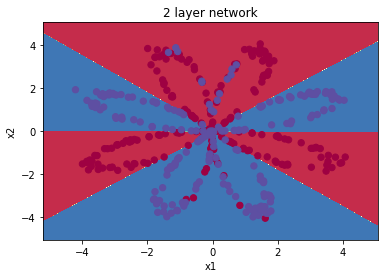

In [14]:
plot_decision_boundary(lambda x: plot_network(x), x.numpy(), y.numpy())
plt.title('2 layer network')

可以看到神经网络能够非常好地分类这个复杂的数据，和前面的 logistic 回归相比，神经网络因为有了激活函数的存在，成了一个非线性分类器，所以神经网络分类的边界更加复杂。

## 3.4、Sequential 和 Module

我们讲了数据处理，模型构建，loss 函数设计等等内容，但是目前为止我们还没有准备好构建一个完整的机器学习系统，一个完整的机器学习系统需要我们不断地读写模型。在现实应用中，一般我们会将模型在本地进行训练，然后保存模型，接着我们会将模型部署到不同的地方进行应用，所以在这节课我们会教大家如何保存 PyTorch 的模型。

首先我们会讲一下 PyTorch 中的模块，Sequential 和 Module。

对于前面的线性回归模型、 Logistic回归模型和神经网络，我们在构建的时候定义了需要的参数。这对于比较小的模型是可行的，但是对于大的模型，比如100 层的神经网络，这个时候再去手动定义参数就显得非常麻烦，所以 PyTorch 提供了两个模块来帮助我们构建模型，一个是Sequential，一个是 Module。

Sequential 允许我们构建序列化的模块，而 Module 是一种更加灵活的模型定义方式，我们下面分别用 Sequential 和 Module 来定义上面的神经网络。

In [15]:
# Sequential
seq_net = nn.Sequential(
    nn.Linear(2, 4), # PyTorch 中的线性层，wx + b
    nn.Tanh(),
    nn.Linear(4, 1)
)

In [16]:
# 序列模块可以通过索引访问每一层

seq_net[0] # 第一层

Linear(in_features=2, out_features=4, bias=True)

In [17]:
# 打印出第一层的权重

w0 = seq_net[0].weight
print(w0)

Parameter containing:
tensor([[-0.4777,  0.0658],
        [ 0.0695, -0.5764],
        [-0.4542, -0.2924],
        [ 0.2402,  0.3405]])


In [18]:
# 通过 parameters 可以取得模型的参数
param = seq_net.parameters()

# 定义优化器
optim = torch.optim.SGD(param, 1.)

In [19]:
# 我们训练 10000 次
for e in range(10000):
    out = seq_net(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data[0]))

D:\anacondapy3.6\lib\site-packages\ipykernel_launcher.py:9: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if __name__ == '__main__':


epoch: 1000, loss: 0.2883152365684509
epoch: 2000, loss: 0.24875670671463013
epoch: 3000, loss: 0.23536334931850433
epoch: 4000, loss: 0.22895923256874084
epoch: 5000, loss: 0.2248474806547165
epoch: 6000, loss: 0.2218615859746933
epoch: 7000, loss: 0.2195439338684082
epoch: 8000, loss: 0.21767392754554749
epoch: 9000, loss: 0.21613408625125885
epoch: 10000, loss: 0.21484866738319397


可以看到，训练 10000 次 loss 比之前的更低，这是因为 PyTorch 自带的模块比我们写的更加稳定，同时也有一些初始化的问题在里面，关于参数初始化，我们会在后面的讲到。

In [20]:
def plot_seq(x):
    out = F.sigmoid(seq_net(Variable(torch.from_numpy(x).float()))).data.numpy()
    out = (out > 0.5) * 1
    return out

Text(0.5,1,'sequential')

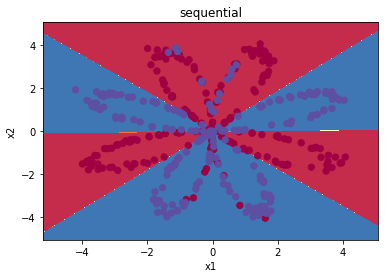

In [21]:
plot_decision_boundary(lambda x: plot_seq(x), x.numpy(), y.numpy())
plt.title('sequential')

接着我们讲一讲如何保存模型，保存模型在 PyTorch 中有两种方式，一种是将模型结构和参数都保存在一起，一种是只将参数保存下来，下面我们都一一介绍一下。

In [22]:
# 将参数和模型保存在一起
torch.save(seq_net, 'save_seq_net.pth')

上面就是保存模型的方式，torch.save 里面有两个参数，第一个是要保存的模型，第二个参数是保存的路径，读取模型的方式也非常简单。

In [23]:
# 读取保存的模型
seq_net1 = torch.load('save_seq_net.pth')

In [24]:
seq_net1

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [25]:
print(seq_net1[0].weight)

tensor([[-10.5833,   3.2113],
        [  8.6545,  -9.5867],
        [-10.5926, -12.4667],
        [ -0.1630,   9.3357]])


我们可以看到我们重新读入了模型，并且将其命名为 seq_net1，并且打印了第一层的参数

下面我们看看第二种保存模型的方式，只保存参数而不保存模型结构

In [26]:
# 保存模型参数
torch.save(seq_net.state_dict(), 'save_seq_net_params.pth')

通过上面的方式，我们保存了模型的参数，如果要重新读入模型的参数，首先我们需要重新定义一次模型，接着重新读入参数

In [27]:
seq_net2 = nn.Sequential(
    nn.Linear(2, 4),
    nn.Tanh(),
    nn.Linear(4, 1)
)

seq_net2.load_state_dict(torch.load('save_seq_net_params.pth'))

In [28]:
seq_net2

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [29]:
print(seq_net2[0].weight)

Parameter containing:
tensor([[-10.5833,   3.2113],
        [  8.6545,  -9.5867],
        [-10.5926, -12.4667],
        [ -0.1630,   9.3357]])


通过这种方式我们也重新读入了相同的模型，打印第一层的参数对比，发现和前面的办法是一样

有这两种保存和读取模型的方法，我们推荐使用第二种，因为第二种可移植性更强

下面我们再用 Module 定义这个模型，下面是使用 Module 的模板

```python
class 网络名字(nn.Module):
    def __init__(self, 一些定义的参数):
        super(网络名字, self).__init__()
        self.layer1 = nn.Linear(num_input, num_hidden)
        self.layer2 = nn.Sequential(...)
        ...

        定义需要用的网络层

    def forward(self, x): # 定义前向传播
        x1 = self.layer1(x)
        x2 = self.layer2(x)
        x = x1 + x2
        ...
        return x
 ```
 
注意的是，Module 里面也可以使用 Sequential，同时 Module 非常灵活，具体体现在 forward 中，如何复杂的操作都能直观的在 forward 里面执行

下面我们照着模板实现一下上面的神经网络

In [30]:
class module_net(nn.Module):
    def __init__(self, num_input, num_hidden, num_output):
        super(module_net, self).__init__()
        self.layer1 = nn.Linear(num_input, num_hidden)
        
        self.layer2 = nn.Tanh()
        
        self.layer3 = nn.Linear(num_hidden, num_output)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [31]:
mo_net = module_net(2, 4, 1)

In [32]:
# 访问模型中的某层可以直接通过名字

# 第一层
l1 = mo_net.layer1
print(l1)

Linear(in_features=2, out_features=4, bias=True)


In [33]:
# 打印出第一层的权重
print(l1.weight)

Parameter containing:
tensor([[ 0.0738, -0.3098],
        [ 0.4631,  0.5240],
        [ 0.0504,  0.5788],
        [ 0.0608, -0.6125]])


In [34]:
# 定义优化器
optim = torch.optim.SGD(mo_net.parameters(), 1.)

In [35]:
# 我们训练 10000 次
for e in range(10000):
    out = mo_net(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data[0]))

D:\anacondapy3.6\lib\site-packages\ipykernel_launcher.py:9: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if __name__ == '__main__':


epoch: 1000, loss: 0.28842657804489136
epoch: 2000, loss: 0.27728191018104553
epoch: 3000, loss: 0.2705077528953552
epoch: 4000, loss: 0.2656717002391815
epoch: 5000, loss: 0.2620882987976074
epoch: 6000, loss: 0.2593555152416229
epoch: 7000, loss: 0.2571963369846344
epoch: 8000, loss: 0.2554126977920532
epoch: 9000, loss: 0.25384941697120667
epoch: 10000, loss: 0.25235870480537415


In [36]:
# 保存模型
torch.save(mo_net.state_dict(), 'module_net.pth')

可以看到我们得到了相同的结果，而且使用 Sequential 和 Module 来定义模型更加方便

在这一节中我们还是使用梯度下降法来优化参数，在神经网络中，这种优化方法有一个特别的名字，反向传播算法，下一次课我们会讲一讲什么是反向传播算法

**小练习：** 改变网络的隐藏层神经元数目，或者试试定义一个 5 层甚至更深的模型，增加训练次数，改变学习率，看看结果会怎么样

下面举个例子

In [37]:
net = nn.Sequential(
    nn.Linear(2, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 1)
)

optim = torch.optim.SGD(net.parameters(), 0.1)

In [38]:
# 我们训练 20000 次
for e in range(20000):
    out = net(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data[0]))

D:\anacondapy3.6\lib\site-packages\ipykernel_launcher.py:9: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if __name__ == '__main__':


epoch: 1000, loss: 0.2912902235984802
epoch: 2000, loss: 0.2189941704273224
epoch: 3000, loss: 0.19962327182292938
epoch: 4000, loss: 0.19149142503738403
epoch: 5000, loss: 0.18638372421264648
epoch: 6000, loss: 0.18205377459526062
epoch: 7000, loss: 0.17803189158439636
epoch: 8000, loss: 0.17428527772426605
epoch: 9000, loss: 0.17081469297409058
epoch: 10000, loss: 0.16762183606624603
epoch: 11000, loss: 0.16462059319019318
epoch: 12000, loss: 0.16163471341133118
epoch: 13000, loss: 0.15833990275859833
epoch: 14000, loss: 0.15444788336753845
epoch: 15000, loss: 0.15022262930870056
epoch: 16000, loss: 0.14608433842658997
epoch: 17000, loss: 0.14257605373859406
epoch: 18000, loss: 0.13981541991233826
epoch: 19000, loss: 0.13775764405727386
epoch: 20000, loss: 0.13596601784229279


Text(0.5,1,'sequential')

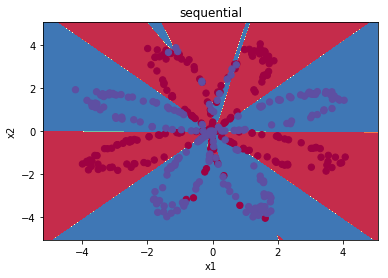

In [39]:
def plot_net(x):
    out = F.sigmoid(net(Variable(torch.from_numpy(x).float()))).data.numpy()
    out = (out > 0.5) * 1
    return out

plot_decision_boundary(lambda x: plot_net(x), x.numpy(), y.numpy())
plt.title('sequential')

**小练习2：** 用 nn 模型来构建一个 线性回归模型，并和我们之前的学习产生联系，打印出相应的 grad。

下面给出一个参考

In [40]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

w:  Parameter containing:
tensor([[ 0.4817,  0.0065, -0.5102],
        [-0.5363, -0.0209, -0.4924]])
b:  Parameter containing:
tensor([-0.2160, -0.4047])
loss:  0.9969264268875122
dL/dw:  tensor([[ 0.1379,  0.1890, -0.5389],
        [-0.2717,  0.4896, -0.4544]])
dL/db:  tensor([ 0.0587, -0.2251])
loss after 1 step optimization:  0.9877818822860718
